<a href="https://colab.research.google.com/github/arkadiuszkulpa/House_prediction/blob/main/Kaggle_Housing_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Connect to Google Drive and fetch dataset**


In [ ]:
!git clone https://github.com/arkadiuszkulpa/House_prediction.git

Cloning into 'House_prediction'...


In [ ]:
%cd /content/House_prediction

/content/House_prediction


In [ ]:
!git status

On branch main

No commits yet

nothing to commit (create/copy files and use "git add" to track)


In [ ]:
!git pull origin main

fatal: couldn't find remote ref main


In [ ]:
!git add .

In [ ]:
!git commit --m 'first commit'

In [ ]:
!git push origin main

In [ ]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import syssys
sys.path.append('/content/drive/My Drive/Kaggle')

In [ ]:

import pandas as pd

train_data = pd.read_csv("/content/drive/MyDrive/Kaggle/train.csv")

In [ ]:
display(train_data)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


<Axes: >

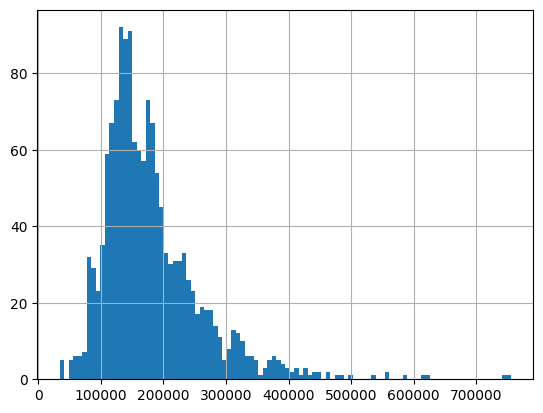

In [ ]:
train_data["SalePrice"].hist(bins=100)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Identify the target column (change "target" if your dataset has a different label column)
target_col = "SalePrice"

# Create price bins (e.g., 10 categories)
train_data["price_bins"] = pd.qcut(train_data[target_col], q=10, labels=False, duplicates="drop")



# Perform train-validation split with stratification on price bins
train_set, val_set = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data["price_bins"])

# Ensure all columns match before saving
assert train_set.columns.equals(val_set.columns), "Mismatch in train and val columns!"

# Drop the temporary bin column
train_set = train_set.drop(columns=["price_bins"])
val_set = val_set.drop(columns=["price_bins"])

# save (optional)
train_set.to_csv("train_split.csv", index=False)
val_set.to_csv("val_split.csv", index=False)

print("Successfully split dataset using price bins!")


Successfully split dataset using price bins!


<Axes: >

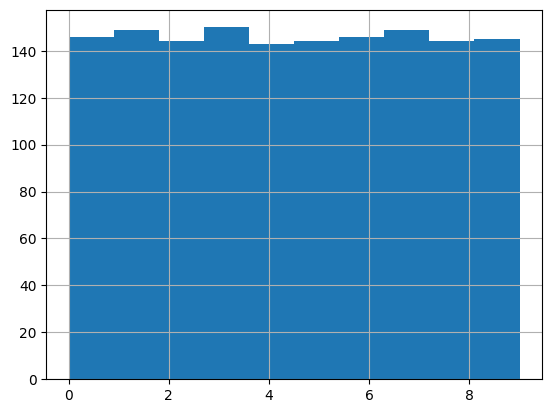

In [ ]:
train_data["price_bins"].hist()


In [ ]:
display(train_set.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
display(val_set.columns)

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [ ]:
display(len(train_set), len(val_set))

1168

292

In [ ]:
# check which features have a population of nulls greater than 80%
null_dict = {}
for feature in train_set:
  number_of_nulls = train_set[feature].isnull().sum()
  number_of_values = train_set[feature].count().sum()
  number_total = number_of_nulls + number_of_values
  null_percentage = number_of_nulls / number_total
  if number_of_nulls > 0:
    null_dict[feature] = {"number": number_of_nulls,
                          "percentage": null_percentage}

print(type(null_dict.items()))
for x in null_dict:
  print(f"feature {x} has {null_dict[x]['number']} nulls, which is a percentage of {(null_dict[x]['percentage']*100).round(2)}%")


<class 'dict_items'>
feature LotFrontage has 212 nulls, which is a percentage of 18.15%
feature Alley has 1095 nulls, which is a percentage of 93.75%
feature MasVnrType has 693 nulls, which is a percentage of 59.33%
feature MasVnrArea has 8 nulls, which is a percentage of 0.68%
feature BsmtQual has 33 nulls, which is a percentage of 2.83%
feature BsmtCond has 33 nulls, which is a percentage of 2.83%
feature BsmtExposure has 34 nulls, which is a percentage of 2.91%
feature BsmtFinType1 has 33 nulls, which is a percentage of 2.83%
feature BsmtFinType2 has 33 nulls, which is a percentage of 2.83%
feature Electrical has 1 nulls, which is a percentage of 0.09%
feature FireplaceQu has 555 nulls, which is a percentage of 47.52%
feature GarageType has 63 nulls, which is a percentage of 5.39%
feature GarageYrBlt has 63 nulls, which is a percentage of 5.39%
feature GarageFinish has 63 nulls, which is a percentage of 5.39%
feature GarageQual has 63 nulls, which is a percentage of 5.39%
feature Ga

In [ ]:
def displayObjectFeatures(feature_names: pd.Series, train_data: pd.DataFrame, columns, singlefigsize: tuple[int, int]):
  """
  Displays bar charts for categorical (object-type) features in a given DataFrame.

    This function selects all object-type (categorical) columns from the provided DataFrame
    and generates bar plots to visualize their frequency distributions. The plots are arranged
    in a grid layout based on the specified number of columns and figure size.

    Parameters:
    ----------
    train_data : pd.DataFrame
        The input DataFrame containing features, including categorical (object-type) features.
    columns : int
        The number of columns to arrange the subplots in the figure.
    singlefigsize : tuple[int, int]
        The single figure size (width, height) for the total matplotlib figure.

  Raises:
    ------
    ValueError
        If the number of categorical features is less than the required grid size.
    IndexError
        If accessing an invalid column index due to incorrect row/column calculation.

    Example:
    -------
    >>> import pandas as pd
    >>> import matplotlib.pyplot as plt
    >>> data = pd.DataFrame({"Category": ["A", "B", "A", "C", "B", "C", "A"],
                             "Type": ["X", "Y", "X", "Z", "Y", "Z", "X"],
                             "Value": [10, 20, 10, 30, 20, 30, 10]})
    >>> displayObjectFeatures(data, columns=2, figsize=(10, 5))
  """
  filtered_train_data = train_data[feature_names.index]
  train_data_objects = filtered_train_data.select_dtypes(include="object")
  train_data_object_columns = train_data_objects.columns

  no_features = len(train_data_object_columns)

  if not isinstance(columns, int) or columns <= 0:
    raise ValueError("Parameter 'columns' must be a positive integer.")

  number_of_columns = min(no_features, int(columns))
  number_of_rows = max(1, -(-no_features // number_of_columns)) #Ceil Division Equivalent

  import matplotlib.pyplot as plt
  total_figsize = [singlefigsize[0] * number_of_columns, singlefigsize[1] * number_of_rows]
  print(total_figsize)
  fig, axes = plt.subplots(number_of_rows, number_of_columns, sharex=False, sharey=False, squeeze=False, figsize=total_figsize)

  feature_index = 0
  for row in range(number_of_rows):
    for col in range(number_of_columns):
      if feature_index >= no_features:
        break
      current_feature = train_data_object_columns[feature_index]
      feature_index += 1

      #print(current_feature)
      feature = train_data[current_feature].value_counts()
      chart = axes[row, col]
      chart.set_title(feature.index.name)
      chart.bar(feature.index, feature.values)





In [ ]:
def turn_value_counts_into_percentages(value_counts_series):
  value_counts_series = value_counts_series.sort_values(ascending=False)
  sum_values = value_counts_series.sum()
  value_percentages = [x/sum_values for x in value_counts_series]
  return value_percentages

In [ ]:
display(len(train_set), len(train_set.columns))

1168

81

In [ ]:
def calculate_percentages_of_object_features(train_set):
  value_percentage_dict = {}

  train_set = train_set.select_dtypes(include="object")
  for feature in train_set:
    value_counts = train_set[feature].value_counts()
    value_percentages = turn_value_counts_into_percentages(value_counts)
    d = {feature: value_counts.index,
         "count": value_counts.values,
         "percentage": value_percentages}

    value_percentage_df = pd.DataFrame(d)

    value_percentage_df_max = value_percentage_df["count"].max()
    #print(value_percentage_df_max)

    value_percentage_df["binary"] = value_percentage_df["count"].map(lambda x: 1 if x==value_percentage_df_max else 0)

    value_percentage_dict[feature] = value_percentage_df
  print(f"There are {len(train_set.columns)} object type columns in the train_set and {len(value_percentage_dict.keys())} object columns in the value_percentage_dict")
  return value_percentage_dict



In [ ]:
percentage_dict = calculate_percentages_of_object_features(train_set)
display(percentage_dict)

There are 43 object type columns in the train_set and 43 object columns in the value_percentage_dict


{'MSZoning':   MSZoning  count  percentage  binary
 0       RL    916    0.784247       1
 1       RM    179    0.153253       0
 2       FV     51    0.043664       0
 3       RH     13    0.011130       0
 4  C (all)      9    0.007705       0,
 'Street':   Street  count  percentage  binary
 0   Pave   1163    0.995719       1
 1   Grvl      5    0.004281       0,
 'Alley':   Alley  count  percentage  binary
 0  Grvl     41    0.561644       1
 1  Pave     32    0.438356       0,
 'LotShape':   LotShape  count  percentage  binary
 0      Reg    746    0.638699       1
 1      IR1    384    0.328767       0
 2      IR2     29    0.024829       0
 3      IR3      9    0.007705       0,
 'LandContour':   LandContour  count  percentage  binary
 0         Lvl   1051    0.899829       1
 1         Bnk     49    0.041952       0
 2         HLS     37    0.031678       0
 3         Low     31    0.026541       0,
 'Utilities':   Utilities  count  percentage  binary
 0    AllPub   1168       

In [ ]:
percentage_dict_95 = {key: df for key, df in percentage_dict.items() if (df["percentage"] >= 0.95).any()}

print(len(percentage_dict_95))

#display(percentage_dict_95)

#displayObjectFeatures(pd.Series(percentage_dict), train_set, columns=3, singlefigsize=[7,8])

6


In [ ]:
display(len(train_set), len(train_set.columns))
train_set = train_set.drop(columns = percentage_dict_95, axis=1)
display(f"Train_set contains total of {len(train_set)} rows and {len(train_set.columns)} columns after removing 95%+ dominant features")

1168

81

'Train_set contains total of 1168 rows and 75 columns after removing 95%+ dominant features'

In [ ]:
# Filter features where dominant feature constituted 0.8 -0.95 % of entries to be turned into a boolean

percentage_dict_80 = {key: df for key, df in percentage_dict.items() if ((df["percentage"] > 0.80) & (df["percentage"] < 0.95)).any()}
display(len(percentage_dict_80))

15

In [ ]:
missing_columns = set(percentage_dict_80.keys()) - set(train_set.columns)
print("Missing columns in train_set:", missing_columns)


Missing columns in train_set: set()


In [ ]:
print("Columns in train_set:", train_set.columns)
print("Columns in 95:", percentage_dict_95.keys())
print("Columns in 80:", percentage_dict_80.keys())

Columns in train_set: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

In [ ]:
for key, df in percentage_dict_95.items():
  print(f"key: {key}, max: {max(df['percentage'])}")

key: Street, max: 0.9957191780821918
key: Utilities, max: 1.0
key: Condition2, max: 0.9897260273972602
key: RoofMatl, max: 0.9828767123287672
key: Heating, max: 0.976027397260274
key: GarageCond, max: 0.9583710407239819


In [ ]:
for key, df in percentage_dict_80.items():
  print(f"key: {key}, max: {max(df['percentage'])}")

key: LandContour, max: 0.8998287671232876
key: LandSlope, max: 0.9443493150684932
key: Condition1, max: 0.8621575342465754
key: BldgType, max: 0.8347602739726028
key: ExterCond, max: 0.8852739726027398
key: BsmtCond, max: 0.9259911894273127
key: BsmtFinType2, max: 0.8898678414096917
key: CentralAir, max: 0.9357876712328768
key: Electrical, max: 0.910025706940874
key: Functional, max: 0.9332191780821918
key: GarageQual, max: 0.9484162895927601
key: PavedDrive, max: 0.9186643835616438
key: MiscFeature, max: 0.9069767441860465
key: SaleType, max: 0.8681506849315068
key: SaleCondition, max: 0.8236301369863014


In [ ]:
list(percentage_dict_80.values())

[  LandContour  count  percentage  binary
 0         Lvl   1051    0.899829       1
 1         Bnk     49    0.041952       0
 2         HLS     37    0.031678       0
 3         Low     31    0.026541       0,
   LandSlope  count  percentage  binary
 0       Gtl   1103    0.944349       1
 1       Mod     54    0.046233       0
 2       Sev     11    0.009418       0,
   Condition1  count  percentage  binary
 0       Norm   1007    0.862158       1
 1      Feedr     70    0.059932       0
 2     Artery     39    0.033390       0
 3       RRAn     17    0.014555       0
 4       PosN     14    0.011986       0
 5       RRAe      9    0.007705       0
 6       PosA      7    0.005993       0
 7       RRNn      4    0.003425       0
 8       RRNe      1    0.000856       0,
   BldgType  count  percentage  binary
 0     1Fam    975    0.834760       1
 1   TwnhsE     95    0.081336       0
 2   Duplex     43    0.036815       0
 3    Twnhs     30    0.025685       0
 4   2fmCon     25    

In [ ]:
for feature in percentage_dict_80.keys():
  for x in train_set[feature]:
    boolean_true = percentage_dict_80[feature][feature].loc[percentage_dict_80[feature]["binary"] == 1].tolist()
    #print(type(boolean_true[0]))
    #train_set[feature]

    #print(boolean_true)
    if x == boolean_true[0] or x == 1:
      #print(f"feature {feature} and value {x} will be changed to 1")
      x = 1
    else:
      #print(f"feature {feature} and value {x} will be changed to 0")
      x = 0


In [ ]:
percentage_dict_rest = {key: df for key, df in percentage_dict.items() if (df["percentage"] < 0.80).all()}
display(len(percentage_dict_rest))

22

In [ ]:
missing_columns = set(percentage_dict_rest.keys()) - set(train_set.columns)
print("Missing columns in train_set:", missing_columns)


Missing columns in train_set: set()


In [ ]:
print("Columns in train_set:", train_set.columns)
print("Columns in 95:", percentage_dict_95.keys())
print("Columns in 80:", percentage_dict_80.keys())
print("Columns in rest:", percentage_dict_rest.keys())

Columns in train_set: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley',
       'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch

[21, 64]


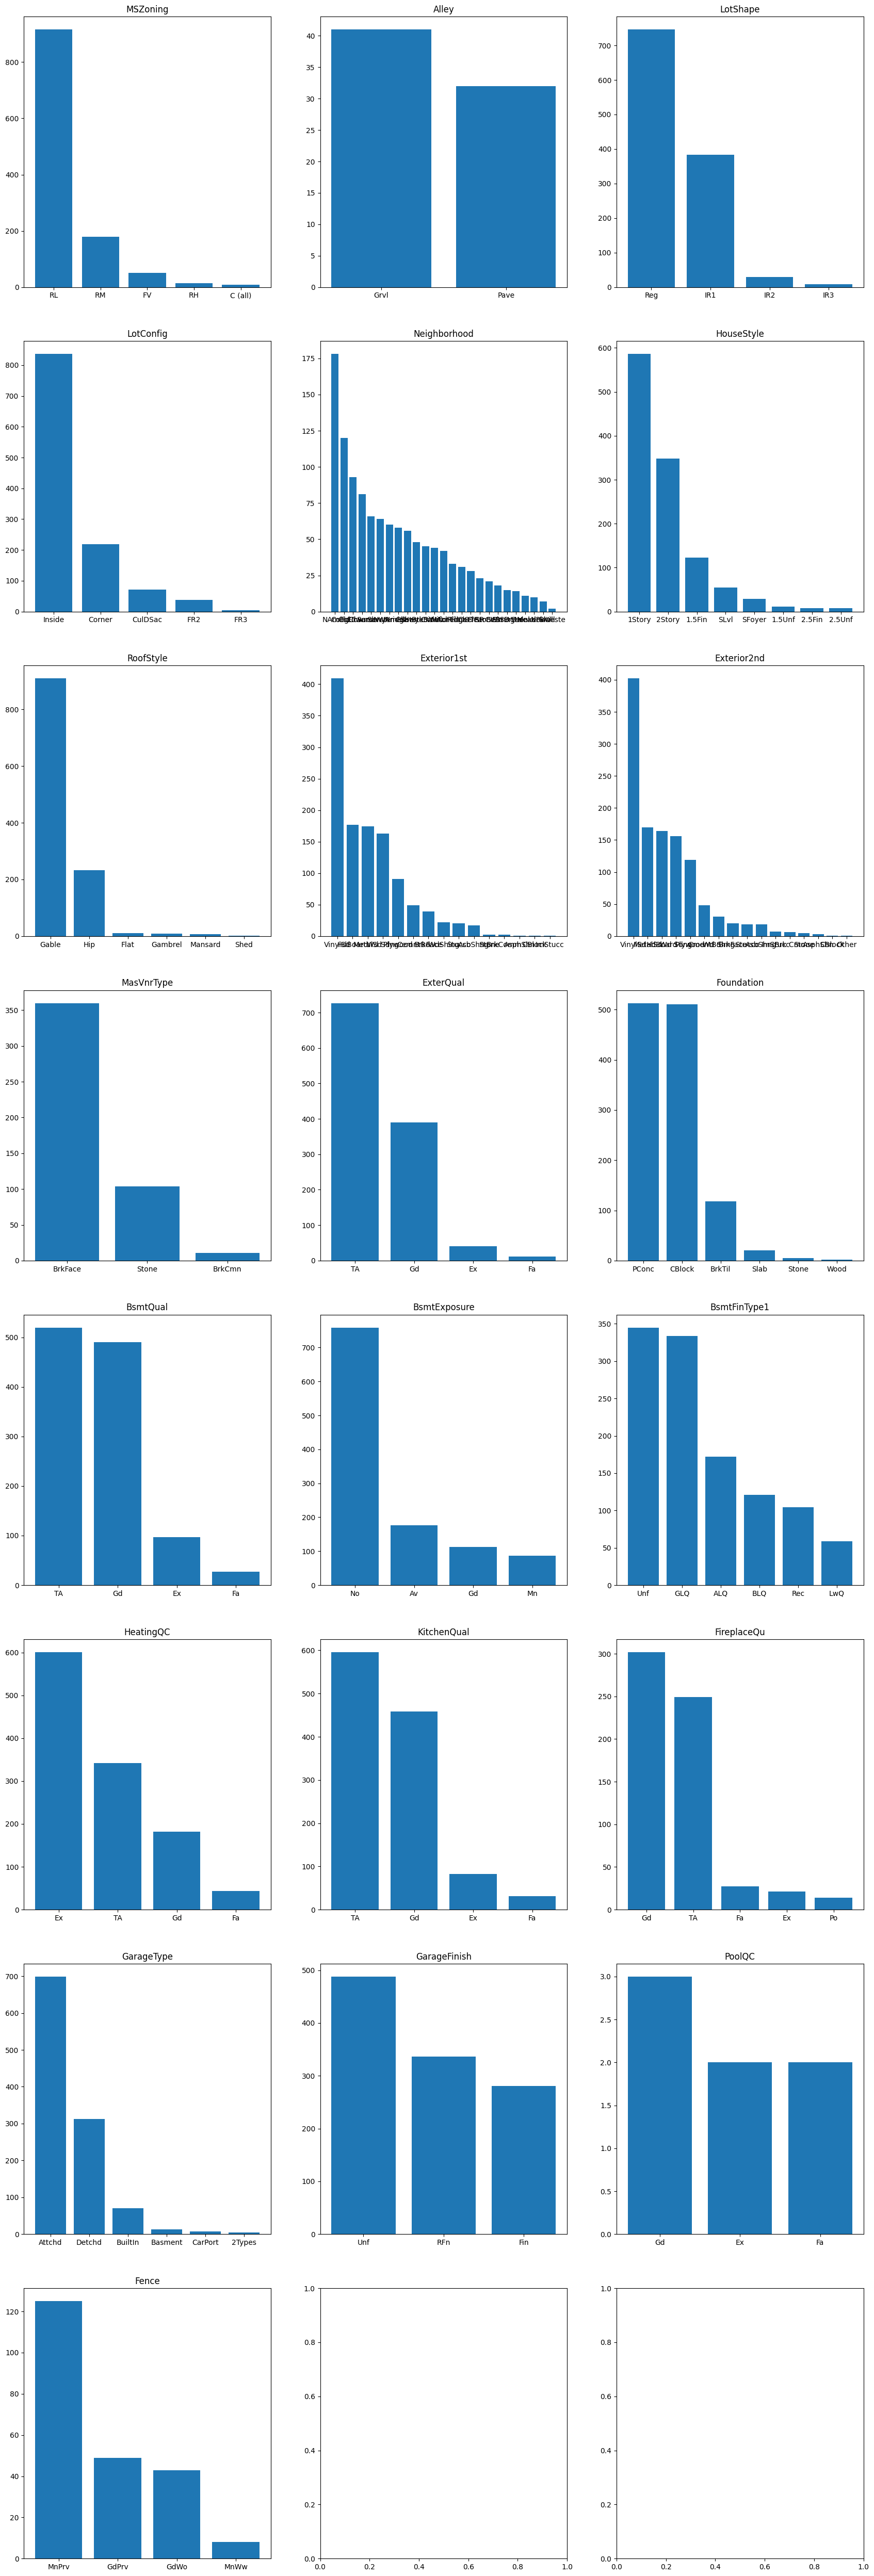

In [ ]:
displayObjectFeatures(pd.Series(percentage_dict_rest), train_set, columns=3, singlefigsize=[7,8])

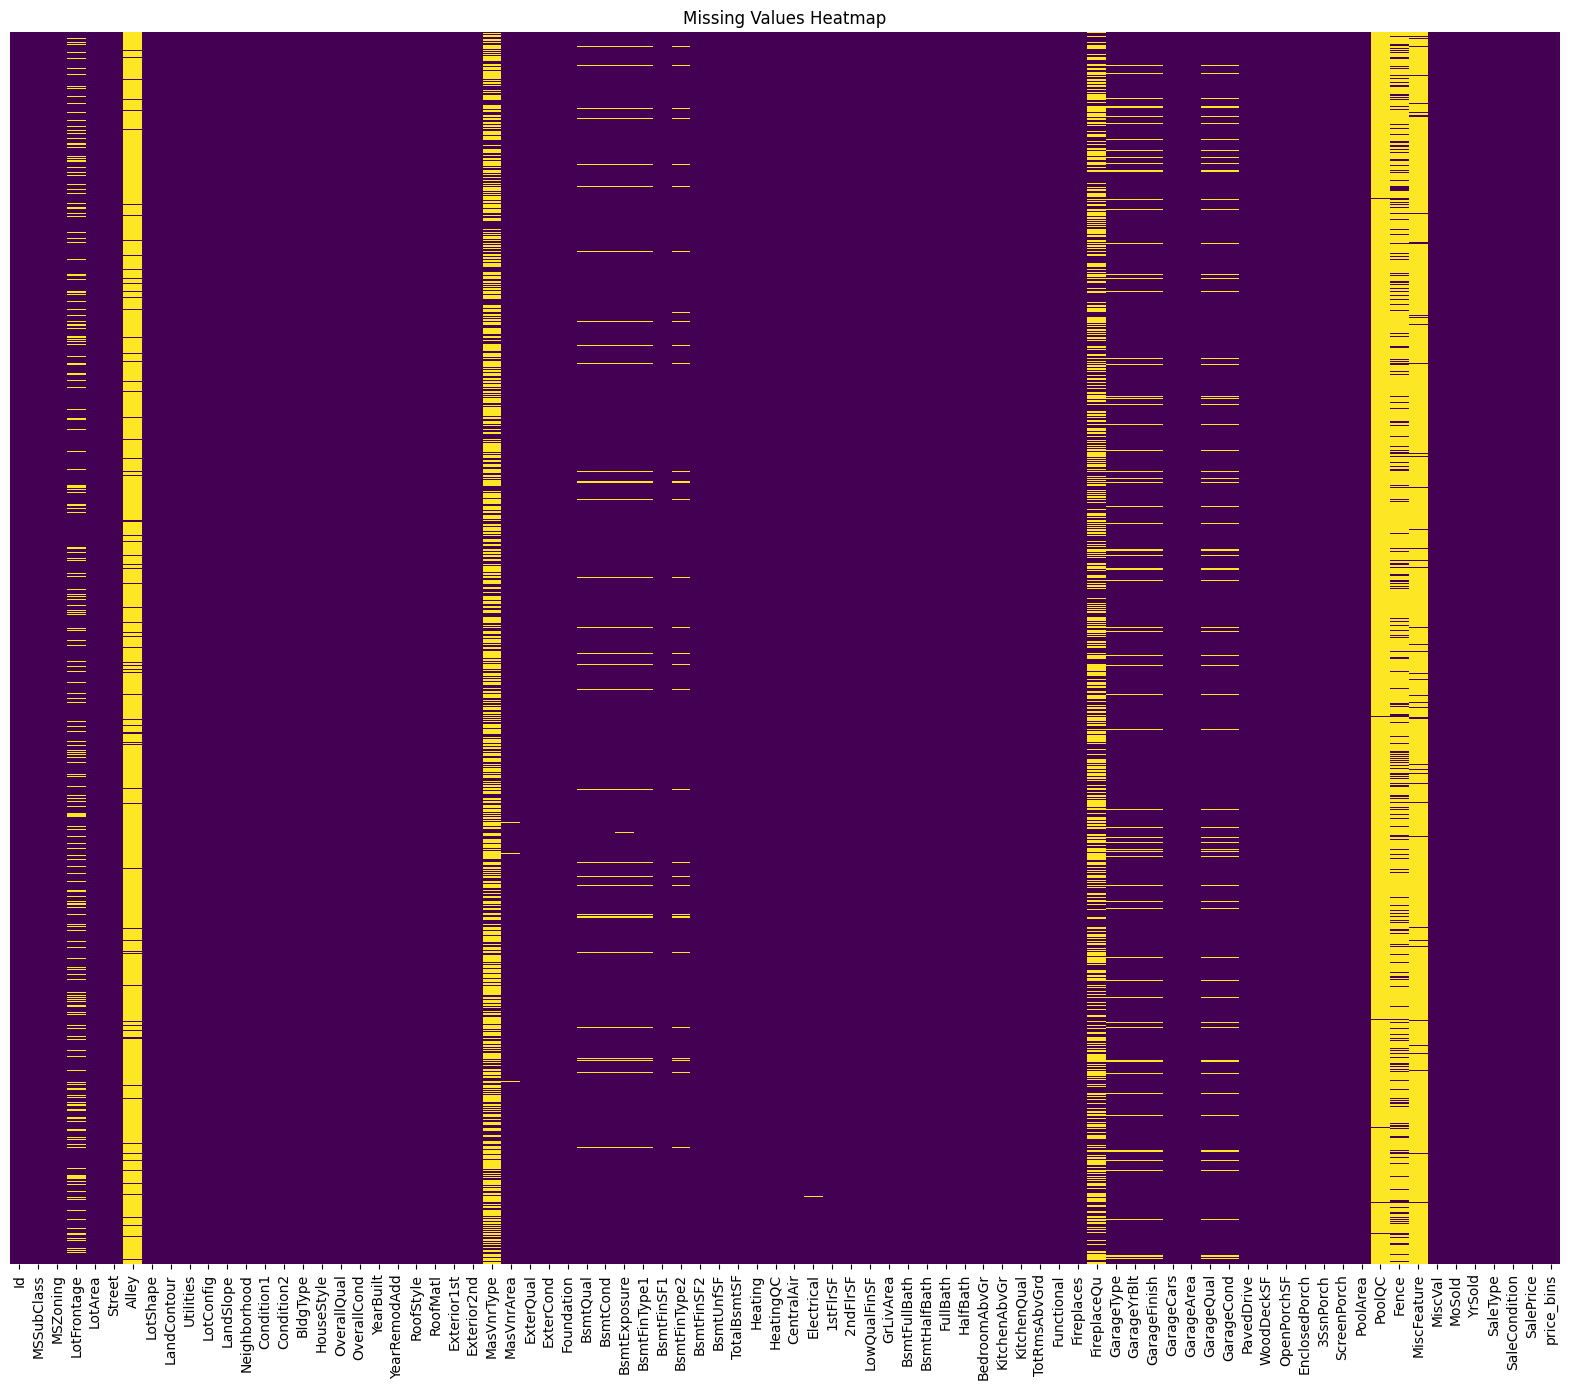

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,16))
sns.heatmap(train_data.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
train_data = train_data.drop(["Alley", "MasVnrType", "FireplaceQu", "PoolQC", "Fence", "MiscFeature", "Utilities"], axis=1)

In [ ]:
#Null Inputation
train_data_null_filter = []

for x in train_data:
  filter = train_data[x].isnull().value_counts()
  # if filter["True"]:
  #   print("found nulls")
  # else:
  #   print("no null values found")

  try:
    print(filter["True"])
  except:
    print("could not print true")
  print(filter)
  #train_data_null_filter.append(filter)




display(train_data_null_filter)

# chart = axes[1, ]

#       chart = axes[row, col]
#       chart.set_title(feature.index.name)
#       chart.bar(feature.index, feature.values)






could not print true
Id
False    1460
Name: count, dtype: int64
could not print true
MSSubClass
False    1460
Name: count, dtype: int64
could not print true
MSZoning
False    1460
Name: count, dtype: int64
could not print true
LotFrontage
False    1201
True      259
Name: count, dtype: int64
could not print true
LotArea
False    1460
Name: count, dtype: int64
could not print true
Street
False    1460
Name: count, dtype: int64
could not print true
LotShape
False    1460
Name: count, dtype: int64
could not print true
LandContour
False    1460
Name: count, dtype: int64
could not print true
LotConfig
False    1460
Name: count, dtype: int64
could not print true
LandSlope
False    1460
Name: count, dtype: int64
could not print true
Neighborhood
False    1460
Name: count, dtype: int64
could not print true
Condition1
False    1460
Name: count, dtype: int64
could not print true
Condition2
False    1460
Name: count, dtype: int64
could not print true
BldgType
False    1460
Name: count, dtype: int

[]

In [ ]:
train_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,price_bins
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890,4.489726
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883,2.873963
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000,0.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000,2.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000,4.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000,7.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000,9.000000


array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

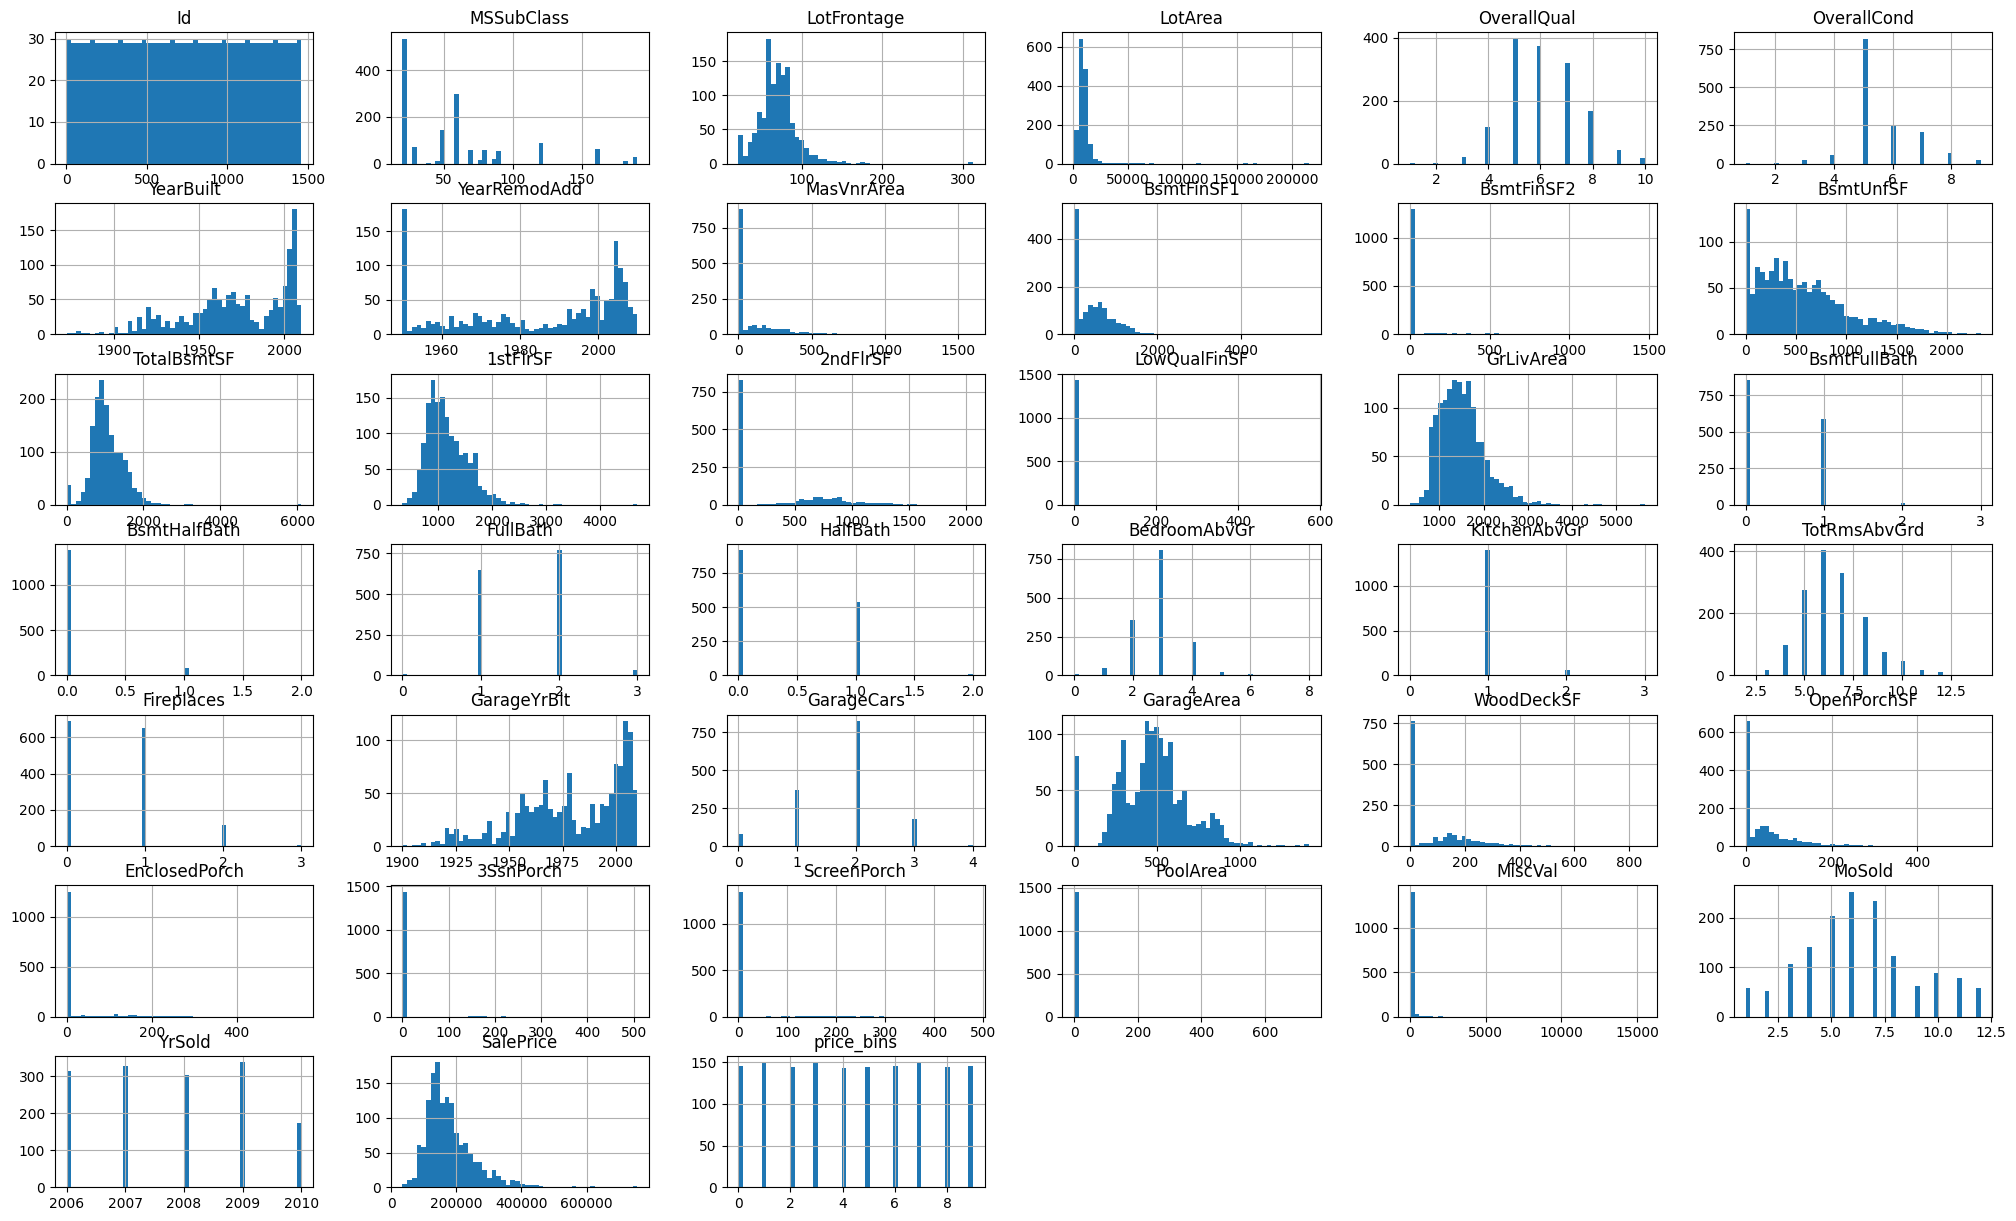

In [ ]:
train_data.hist(bins=50, figsize=(25,15))

In [ ]:
index_names = train_data.columns

In [ ]:
for i in index_names:
  display(train_data[i].value_counts())
  #display(train_data[index_names[i]].value_counts())

,count
Id,
1,1
982,1
980,1
979,1
978,1
...,...
485,1
484,1
483,1


,count
MSSubClass,
20,536
60,299
50,144
120,87
30,69
160,63
70,60
80,58
90,52


,count
MSZoning,
RL,1151
RM,218
FV,65
RH,16
C (all),10


,count
LotFrontage,
60.0,143
70.0,70
80.0,69
50.0,57
75.0,53
...,...
137.0,1
141.0,1
38.0,1


,count
LotArea,
7200,25
9600,24
6000,17
9000,14
8400,14
...,...
14601,1
13682,1
4058,1


,count
Street,
Pave,1454
Grvl,6


,count
LotShape,
Reg,925
IR1,484
IR2,41
IR3,10


,count
LandContour,
Lvl,1311
Bnk,63
HLS,50
Low,36


,count
LotConfig,
Inside,1052
Corner,263
CulDSac,94
FR2,47
FR3,4


,count
LandSlope,
Gtl,1382
Mod,65
Sev,13


,count
Neighborhood,
NAmes,225
CollgCr,150
OldTown,113
Edwards,100
Somerst,86
Gilbert,79
NridgHt,77
Sawyer,74
NWAmes,73


,count
Condition1,
Norm,1260
Feedr,81
Artery,48
RRAn,26
PosN,19
RRAe,11
PosA,8
RRNn,5
RRNe,2


,count
Condition2,
Norm,1445
Feedr,6
Artery,2
RRNn,2
PosN,2
PosA,1
RRAn,1
RRAe,1


,count
BldgType,
1Fam,1220
TwnhsE,114
Duplex,52
Twnhs,43
2fmCon,31


,count
HouseStyle,
1Story,726
2Story,445
1.5Fin,154
SLvl,65
SFoyer,37
1.5Unf,14
2.5Unf,11
2.5Fin,8


,count
OverallQual,
5,397
6,374
7,319
8,168
4,116
9,43
3,20
10,18
2,3


,count
OverallCond,
5,821
6,252
7,205
8,72
4,57
3,25
9,22
2,5
1,1


,count
YearBuilt,
2006,67
2005,64
2004,54
2007,49
2003,45
...,...
1875,1
1911,1
1917,1


,count
YearRemodAdd,
1950,178
2006,97
2007,76
2005,73
2004,62
...,...
2010,6
1986,5
1952,5


,count
RoofStyle,
Gable,1141
Hip,286
Flat,13
Gambrel,11
Mansard,7
Shed,2


,count
RoofMatl,
CompShg,1434
Tar&Grv,11
WdShngl,6
WdShake,5
Metal,1
Membran,1
Roll,1
ClyTile,1


,count
Exterior1st,
VinylSd,515
HdBoard,222
MetalSd,220
Wd Sdng,206
Plywood,108
CemntBd,61
BrkFace,50
WdShing,26
Stucco,25


,count
Exterior2nd,
VinylSd,504
MetalSd,214
HdBoard,207
Wd Sdng,197
Plywood,142
CmentBd,60
Wd Shng,38
Stucco,26
BrkFace,25


,count
MasVnrArea,
0.0,861
180.0,8
72.0,8
108.0,8
120.0,7
...,...
562.0,1
89.0,1
921.0,1


,count
ExterQual,
TA,906
Gd,488
Ex,52
Fa,14


,count
ExterCond,
TA,1282
Gd,146
Fa,28
Ex,3
Po,1


,count
Foundation,
PConc,647
CBlock,634
BrkTil,146
Slab,24
Stone,6
Wood,3


,count
BsmtQual,
TA,649
Gd,618
Ex,121
Fa,35


,count
BsmtCond,
TA,1311
Gd,65
Fa,45
Po,2


,count
BsmtExposure,
No,953
Av,221
Gd,134
Mn,114


,count
BsmtFinType1,
Unf,430
GLQ,418
ALQ,220
BLQ,148
Rec,133
LwQ,74


,count
BsmtFinSF1,
0,467
24,12
16,9
686,5
662,5
...,...
1338,1
1324,1
1460,1


,count
BsmtFinType2,
Unf,1256
Rec,54
LwQ,46
BLQ,33
ALQ,19
GLQ,14


,count
BsmtFinSF2,
0,1293
180,5
374,3
551,2
147,2
...,...
532,1
165,1
1120,1


,count
BsmtUnfSF,
0,118
728,9
384,8
600,7
300,7
...,...
551,1
1257,1
605,1


,count
TotalBsmtSF,
0,37
864,35
672,17
912,15
1040,14
...,...
1838,1
1581,1
707,1


,count
Heating,
GasA,1428
GasW,18
Grav,7
Wall,4
OthW,2
Floor,1


,count
HeatingQC,
Ex,741
TA,428
Gd,241
Fa,49
Po,1


,count
CentralAir,
Y,1365
N,95


,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


,count
1stFlrSF,
864,25
1040,16
912,14
894,12
848,12
...,...
1509,1
2515,1
605,1


,count
2ndFlrSF,
0,829
728,10
504,9
546,8
672,8
...,...
1538,1
914,1
1067,1


,count
LowQualFinSF,
0,1434
80,3
360,2
205,1
479,1
397,1
514,1
120,1
481,1


,count
GrLivArea,
864,22
1040,14
894,11
1456,10
848,10
...,...
2296,1
1123,1
1199,1


,count
BsmtFullBath,
0,856
1,588
2,15
3,1


,count
BsmtHalfBath,
0,1378
1,80
2,2


,count
FullBath,
2,768
1,650
3,33
0,9


,count
HalfBath,
0,913
1,535
2,12


,count
BedroomAbvGr,
3,804
2,358
4,213
1,50
5,21
6,7
0,6
8,1


,count
KitchenAbvGr,
1,1392
2,65
3,2
0,1


,count
KitchenQual,
TA,735
Gd,586
Ex,100
Fa,39


,count
TotRmsAbvGrd,
6,402
7,329
5,275
8,187
4,97
9,75
10,47
11,18
3,17


,count
Functional,
Typ,1360
Min2,34
Min1,31
Mod,15
Maj1,14
Maj2,5
Sev,1


,count
Fireplaces,
0,690
1,650
2,115
3,5


,count
GarageType,
Attchd,870
Detchd,387
BuiltIn,88
Basment,19
CarPort,9
2Types,6


,count
GarageYrBlt,
2005.0,65
2006.0,59
2004.0,53
2003.0,50
2007.0,49
...,...
1927.0,1
1900.0,1
1906.0,1


,count
GarageFinish,
Unf,605
RFn,422
Fin,352


,count
GarageCars,
2,824
1,369
3,181
0,81
4,5


,count
GarageArea,
0,81
440,49
576,47
240,38
484,34
...,...
320,1
594,1
831,1


,count
GarageQual,
TA,1311
Fa,48
Gd,14
Ex,3
Po,3


,count
GarageCond,
TA,1326
Fa,35
Gd,9
Po,7
Ex,2


,count
PavedDrive,
Y,1340
N,90
P,30


,count
WoodDeckSF,
0,761
192,38
100,36
144,33
120,31
...,...
326,1
179,1
103,1


,count
OpenPorchSF,
0,656
36,29
48,22
20,21
40,19
...,...
11,1
523,1
125,1


,count
EnclosedPorch,
0,1252
112,15
96,6
192,5
144,5
...,...
54,1
136,1
148,1


,count
3SsnPorch,
0,1436
168,3
144,2
180,2
216,2
290,1
153,1
96,1
23,1


,count
ScreenPorch,
0,1344
192,6
120,5
224,5
189,4
...,...
291,1
260,1
385,1


,count
PoolArea,
0,1453
512,1
648,1
576,1
555,1
480,1
519,1
738,1


,count
MiscVal,
0,1408
400,11
500,8
700,5
450,4
600,4
2000,4
1200,2
480,2


,count
MoSold,
6,253
7,234
5,204
4,141
8,122
3,106
10,89
11,79
9,63


,count
YrSold,
2009,338
2007,329
2006,314
2008,304
2010,175


,count
SaleType,
WD,1267
New,122
COD,43
ConLD,9
ConLI,5
ConLw,5
CWD,4
Oth,3
Con,2


,count
SaleCondition,
Normal,1198
Partial,125
Abnorml,101
Family,20
Alloca,12
AdjLand,4


,count
SalePrice,
140000,20
135000,17
155000,14
145000,14
190000,13
...,...
202665,1
164900,1
208300,1


,count
price_bins,
3,150
7,149
1,149
6,146
0,146
9,145
8,144
2,144
5,144


In [ ]:
# Prepare values for algorithm input